### 1. Create feature

If you want to create the features, first of all download the data from [link](https://cutt.ly/6enDLYG). Be sure to save the folder together with this notebook. 

Otherwise, just jump to section 2.

In [43]:
from PIL import Image
from tqdm import tqdm
import os
path = 'C:/Users/lukma/Downloads/generative-inpainting-pytorch-master/generative-inpainting-pytorch-master/mali_jpg/'
path_new = 'C:/Users/lukma/Downloads/generative-inpainting-pytorch-master/generative-inpainting-pytorch-master/mali_png/'
for file in tqdm(os.listdir(path)):
    im = Image.open(path + file)
    rgb_im = im.convert('RGB')
    rgb_im.save(path_new + file.rstrip('.png') + '.jpg')

   


100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 146.98it/s]


In [1]:
from PIL import Image
from tqdm import tqdm
import os
path = 'C:/Users/lukma/Downloads/generative-inpainting-pytorch-master/generative-inpainting-pytorch-master/mali_jpg/'
path_new = 'C:/Users/lukma/Downloads/generative-inpainting-pytorch-master/generative-inpainting-pytorch-master/mali_png/'
for file in tqdm(os.listdir(path)):
    im = Image.open(path + file)
    rgb_im = im.convert('RGB')
    rgb_im.save(path_new + file.rstrip('.jpg') + '.png')

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 50.26it/s]


In [1]:
import cv2
import numpy as np
import os
import radialProfile
import glob
from matplotlib import pyplot as plt
import pickle
from tqdm import tqdm

In [44]:
path = ['C:/Users/lukma/Desktop/DS/BST/train/real/', 'C:/Users/lukma/Desktop/DS/BST/train/fake/']
labels = [1, 0]
format_file = ['jpg','jpg']
epsilon = 1e-8
data_train = {}
#number of samples from each dataset
stop = 3000
number_iter = 2 * stop
psd1D_total = np.zeros([number_iter, 179])
label_total = np.zeros([number_iter])
iter_ = 0

for z in range(2):
    cont = 0
    psd1D_average_org = np.zeros(360)
    print(path[z])
    
    for filename in tqdm(glob.glob(path[z]+"/*."+format_file[z])):  
        img = cv2.imread(filename,0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon

        magnitude_spectrum = 20*np.log(np.abs(fshift))

        # Calculate the azimuthally averaged 1D power spectrum
        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
        psd1D_total[iter_,:] = psd1D
        label_total[iter_] = labels[z]

        cont+=1
        iter_+=1
        if cont >= stop:
            break

data_train["data"] = psd1D_total
data_train["label"] = label_total

output = open('dataset_train_BST.pkl', 'wb')
pickle.dump(data_train, output)
output.close()
print("DATA Saved")    

  0%|▏                                                                                | 8/3000 [00:00<00:40, 73.59it/s]

C:/Users/lukma/Desktop/DS/Povetry/train/real_jpg/


  0%|▏                                                                                | 8/3000 [00:00<00:38, 77.13it/s]

C:/Users/lukma/Desktop/DS/Povetry/train/fake_jpg/


100%|█████████████████████████████████████████████████████████████████████████████▉| 2999/3000 [00:40<00:00, 73.88it/s]

DATA Saved


In [25]:
path = ['C:/Users/lukma/Desktop/DS/BST/valid/real/', 'C:/Users/lukma/Desktop/DS/BST/valid/fake/']
#path = ['C:/Users/lukma/Desktop/DS/Povetry/valid/real_jpg/', 'C:/Users/lukma/Desktop/DS/Povetry/valid/fake_jpg/']
labels = [1, 0]
format_file = ['jpg','jpg']
epsilon = 1e-8
data_valid = {}
#number of samples from each dataset
stop = 500
number_iter = 2 * stop
psd1D_total = np.zeros([number_iter, 179])
label_total = np.zeros([number_iter])
iter_ = 0

for z in range(2):
    cont = 0
    psd1D_average_org = np.zeros(360)
    print(path[z])
    
    for filename in tqdm(glob.glob(path[z]+"/*."+format_file[z])):  
        img = cv2.imread(filename,0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon

        magnitude_spectrum = 20*np.log(np.abs(fshift))

        # Calculate the azimuthally averaged 1D power spectrum
        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
        psd1D_total[iter_,:] = psd1D
        label_total[iter_] = labels[z]

        cont+=1
        iter_+=1
        if cont >= stop:
            break

data_valid["data"] = psd1D_total
data_valid["label"] = label_total

output = open('dataset_valid_povetry.pkl', 'wb')
pickle.dump(data_valid, output)
output.close()
print("DATA Saved")

  1%|█▏                                                                                | 7/504 [00:00<00:08, 60.51it/s]

C:/Users/lukma/Desktop/DS/BST_valid/au_jpg/


  2%|█▉                                                                               | 12/504 [00:00<00:08, 58.38it/s]

C:/Users/lukma/Desktop/DS/BST_valid/tp_jpg/


100%|███████████████████████████████████████████████████████████████████████████████▊| 503/504 [00:09<00:00, 54.15it/s]

DATA Saved


### 2. Loading Features

Now, we load the features. Either the pre-computed ones or the features that you have created.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# load feature file
pkl_file_train = open('dataset_train_BST.pkl', 'rb')
data_train = pickle.load(pkl_file_train)
pkl_file_train.close()
X_train = data_train["data"]
y_train = data_train["label"]

We look at the label distribution, to be sure that we have a balanced dataset.

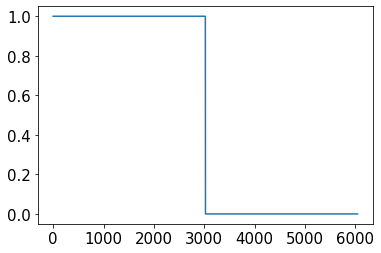

In [41]:
plt.plot(y_train)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# load feature file
pkl_file_valid = open('dataset_valid_BST.pkl', 'rb')
data_valid = pickle.load(pkl_file_valid)
pkl_file_valid.close()
X_valid = data_valid["data"]
y_valid = data_valid["label"]

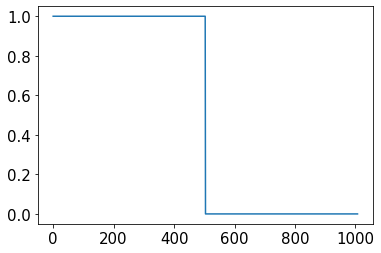

In [43]:
plt.plot(y_valid)

### 3. Check Spectrum

We have a look to the spectrum

3024 3024


Text(0, 0.5, 'Power Spectrum')

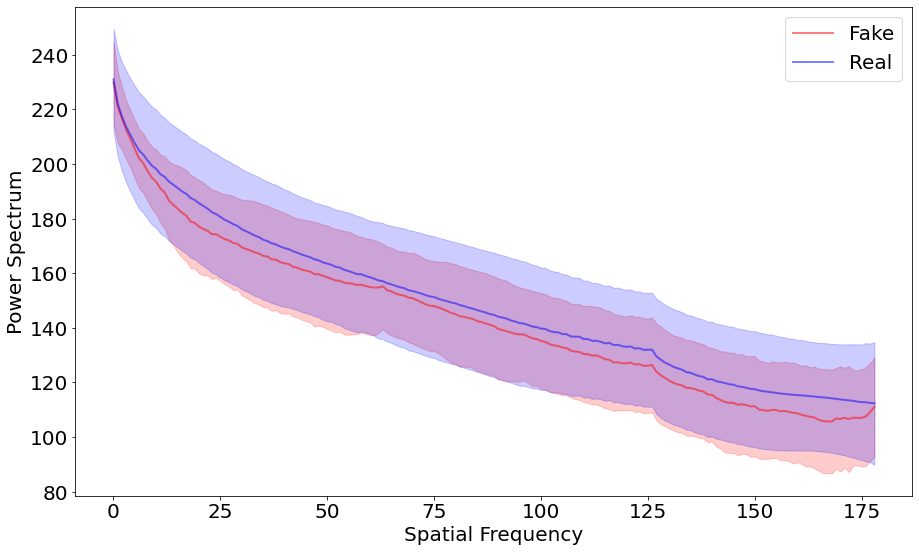

In [44]:
num = int(X_train.shape[0]/2)
num_feat = X_train.shape[1]

psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X_train.shape[0]):   
    if y_train[x]==0:
        psd1D_org_0[cont_0,:] = X_train[x,:]
        cont_0+=1
    elif y_train[x]==1:
        psd1D_org_1[cont_1,:] = X_train[x,:]
        cont_1+=1

print (cont_0, cont_1)        

# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)
ax.legend()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

504 504


Text(0, 0.5, 'Power Spectrum')

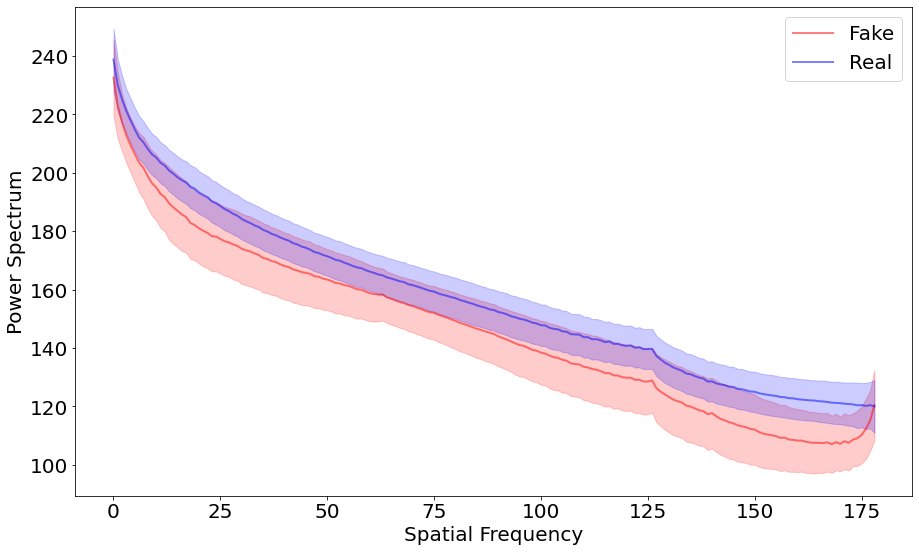

In [45]:
num = int(X_valid.shape[0]/2)
num_feat = X_valid.shape[1]

psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X_valid.shape[0]):   
    if y_valid[x]==0:
        psd1D_org_0[cont_0,:] = X_valid[x,:]
        cont_0+=1
    elif y_valid[x]==1:
        psd1D_org_1[cont_1,:] = X_valid[x,:]
        cont_1+=1

print (cont_0, cont_1)        

# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)
ax.legend()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

### 4. Classification

Now we classify using the features.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

num = 4032
LR = 0
SVM = 0
KNC = 0


for z in tqdm(range(num)):
    # read python dict back from the file
    pkl_file_train = open('dataset_train_BST.pkl', 'rb')
    
    data_train = pickle.load(pkl_file_train)
    pkl_file_train.close()
    
    X_train = data_train["data"]
    y_train = data_train["label"]
    
    pkl_file_valid = open('dataset_valid_BST.pkl', 'rb')
    
    data_valid = pickle.load(pkl_file_valid)
    pkl_file_valid.close()
    
    X_valid = data_valid["data"]
    y_valid = data_valid["label"]
    
    try:

        #from sklearn.model_selection import train_test_split
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        

        from sklearn.svm import SVC
        svclassifier = SVC(kernel='poly')
        svclassifier.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(svclassifier.score(X_test, y_test)))
        
        from sklearn.linear_model import LogisticRegression
        logreg = LogisticRegression(solver='liblinear', max_iter=500)
        logreg.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(logreg.score(X_test, y_test)))
        
        from sklearn.neighbors import KNeighborsClassifier
        knc = KNeighborsClassifier(n_neighbors = 5)
        knc.fit(X_train, y_train)

        
        #SVM+=svclassifier.score(X_valid, y_valid)
        LR+=logreg.score(X_valid, y_valid)
        #KNC+=knc.score(X_valid, y_valid)

 
    except:
        num-=1
        print(num)
        
print("Average SVM: "+str(SVM/num))
print("Average LR: "+str(LR/num))
#print("Average KNC: "+str(KNC/num))

100%|████████████████████████████████████████████████████████████████████████████| 4032/4032 [6:22:27<00:00,  5.69s/it]

Average SVM: 0.0
Average LR: 0.8680555555556237


In [119]:
print(svclassifier.score(X_valid, y_valid))
print(logreg.score(X_valid, y_valid))
print(knc.score(X_valid, y_valid))

0.8442460317460317
0.8680555555555556
0.8501984126984127


In [3]:
filename_svm = 'model_svm_BST.sav'
pickle.dump(svclassifier, open(filename_svm, 'wb'))

In [4]:
filename_lr = 'model_lr_BST.sav'
pickle.dump(logreg, open(filename_lr, 'wb'))

In [3]:
filename_knc = 'model_knc_BST.sav'
pickle.dump(knc, open(filename_knc, 'wb'))

### Метрики качества

In [6]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### SVM

In [8]:
svclassifier = pickle.load(open('model_svm_BST.sav', 'rb'))

In [9]:
y_pred_svm = svclassifier.predict(X_valid)

score = metrics.precision_score(y_valid,y_pred_svm, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_valid,y_pred_svm, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_valid,y_pred_svm, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.8447359602609844
Recall score: 0.8442460317460317
F1 score: 0.8441906738485562


In [10]:
it1 = 0
it2 = 0
for i in range(len(y_valid)):
    if(y_pred_svm[i] - y_valid[i] == -1): it1+=1
    if(y_pred_svm[i] - y_valid[i] == 1): it2+=1  
it1, it2

(69, 88)

Confusion matrix, without normalization
[[416  88]
 [ 69 435]]


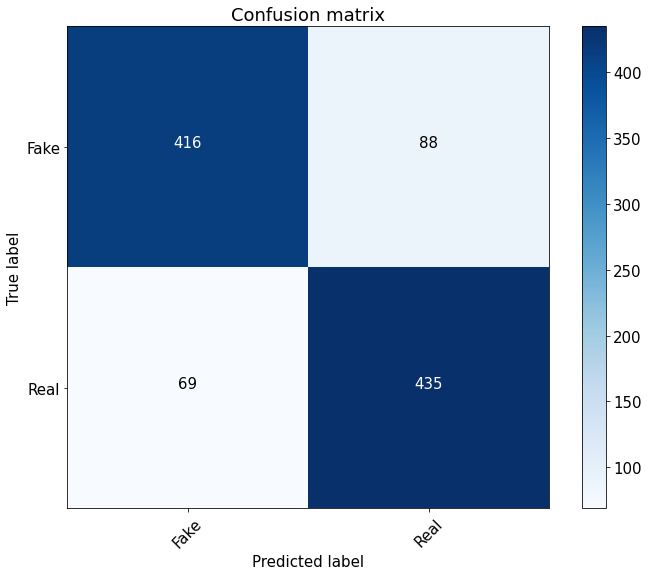

In [29]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_svm = confusion_matrix(y_valid, svclassifier.predict(X_valid))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_svm, classes=['Fake', 'Real'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [62]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_valid,y_pred_svm))

ROC_AUC score: 0.8442460317460317


### Logistic Regression

In [71]:
logreg = pickle.load(open('model_lr_BST.sav', 'rb'))

In [72]:
y_pred_lr = logreg.predict(X_valid)

score = metrics.precision_score(y_valid,y_pred_lr, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_valid,y_pred_lr, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_valid,y_pred_lr, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.8681729576466418
Recall score: 0.8680555555555556
F1 score: 0.868045036186629


Confusion matrix, without normalization
[[433  71]
 [ 62 442]]


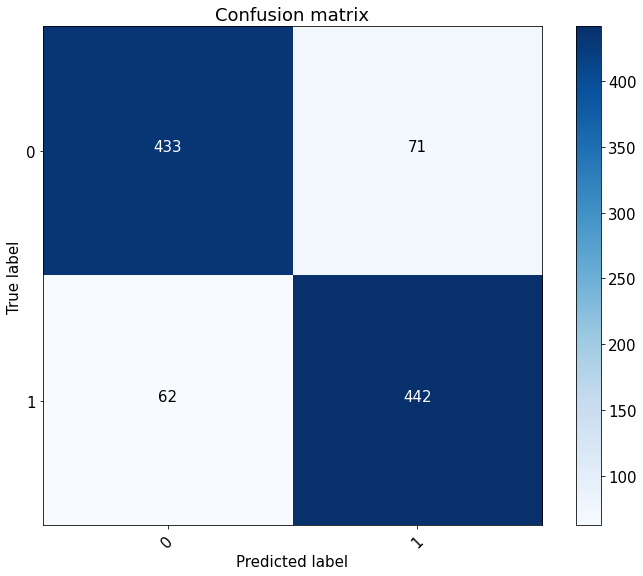

In [73]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_lr = confusion_matrix(y_valid, logreg.predict(X_valid))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_lr, classes=['0', '1'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [74]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_valid,y_pred_lr))

ROC_AUC score: 0.8680555555555556


### K Neighbours

In [75]:
knc = pickle.load(open('model_knc_BST.sav', 'rb'))

In [76]:
y_pred_knc = knc.predict(X_valid)

score = metrics.precision_score(y_valid,y_pred_knc, average= "weighted")
print("SNM /nPrecision score: {}".format(score))
score = metrics.recall_score(y_valid,y_pred_knc, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_valid,y_pred_knc, average= "weighted")
print("F1 score: {}".format(score_lr1))

SNM /nPrecision score: 0.8515283238821599
Recall score: 0.8501984126984127
F1 score: 0.8500565952420591


Confusion matrix, without normalization
[[413  91]
 [ 60 444]]


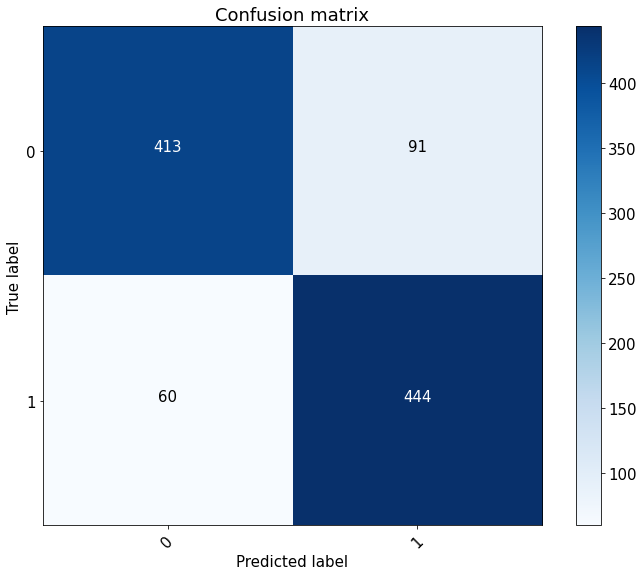

In [77]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_knc = confusion_matrix(y_valid, knc.predict(X_valid))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_knc, classes=['0', '1'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [78]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_valid,y_pred_knc))

ROC_AUC score: 0.8501984126984127


### Проверяем на тестовом наборе данных

In [190]:
loaded_model_kn = pickle.load(open('model_knc_BST.sav', 'rb'))

In [191]:
loaded_model_svm = pickle.load(open('model_svm_BST.sav', 'rb'))
loaded_model_lr = pickle.load(open('model_lr_BST.sav', 'rb'))

In [192]:
import cv2
import numpy as np
import os
import radialProfile
import glob
from matplotlib import pyplot as plt
import pickle
from tqdm import tqdm

In [23]:
path = ['C:/Users/lukma/Desktop/DS/BST/test/real/', 'C:/Users/lukma/Desktop/DS/BST/test/fake/']
labels = [1,0]
format_file = ['jpg','jpg']
epsilon = 1e-8
data_test = {}
#number of samples from each dataset
stop = 504
number_iter = 2 * stop
psd1D_total = np.zeros([number_iter, 179])
label_total = np.zeros([number_iter])
iter_ = 0

for z in range(2):
    cont = 0
    psd1D_average_org = np.zeros(179)
    print(path[z])
    
    for filename in tqdm(glob.glob(path[z]+"/*."+format_file[z])):  
        img = cv2.imread(filename,0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon

        magnitude_spectrum = 20*np.log(np.abs(fshift))

        # Calculate the azimuthally averaged 1D power spectrum
        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
        psd1D_total[iter_,:] = psd1D
        label_total[iter_] = labels[z]

        cont+=1
        iter_+=1
        if cont >= stop:
            break

data_test["data"] = psd1D_total
data_test["label"] = label_total

output = open('dataset_test.pkl', 'wb')
pickle.dump(data_test, output)
output.close()
print("DATA Saved")

  4%|███                                                                              | 19/504 [00:00<00:05, 91.00it/s]

C:/Users/lukma/Desktop/DS/BST/test/real/


  2%|█▍                                                                                | 9/504 [00:00<00:05, 82.79it/s]

C:/Users/lukma/Desktop/DS/BST/test/fake/


100%|███████████████████████████████████████████████████████████████████████████████▊| 503/504 [00:05<00:00, 85.05it/s]

DATA Saved


In [193]:
pkl_file_test = open('dataset_test_BST.pkl', 'rb')
data_test = pickle.load(pkl_file_test)
pkl_file_test.close()
X_test = data_test["data"]
y_test = data_test["label"]

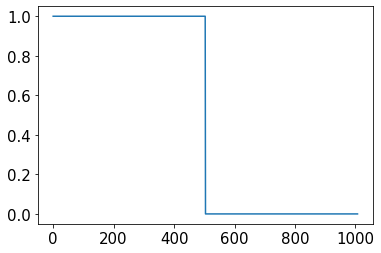

In [194]:
plt.plot(y_test)

504 504


Text(0, 0.5, 'Power Spectrum')

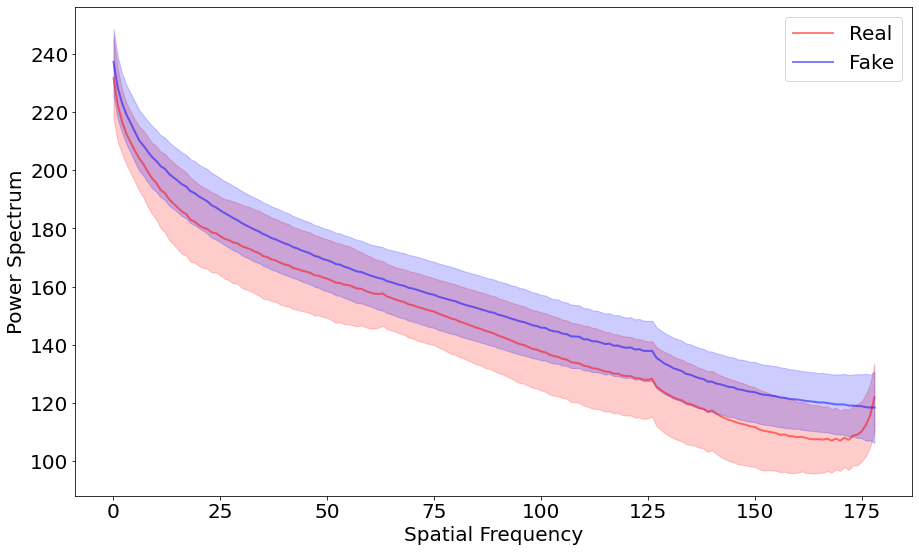

In [195]:
num = int(X_test.shape[0]/2)
num_feat = X_test.shape[1]

psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X_test.shape[0]):   
    if y_test[x]==0:
        psd1D_org_0[cont_0,:] = X_test[x,:]
        cont_0+=1
    elif y_test[x]==1:
        psd1D_org_1[cont_1,:] = X_test[x,:]
        cont_1+=1

print (cont_0, cont_1)        

# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)
ax.legend()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

In [196]:
result_svm = loaded_model_svm.score(X_test, y_test)
result_lr = loaded_model_lr.score(X_test, y_test)
result_kn = loaded_model_kn.score(X_test, y_test)

print(result_svm)
print(result_lr)
print(result_kn)

0.875
0.8611111111111112
0.8720238095238095


In [197]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [198]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### SVM

In [199]:
y1_pred_svm = loaded_model_svm.predict(X_test)

score = metrics.precision_score(y_test,y1_pred_svm, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test,y1_pred_svm, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test,y1_pred_svm, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.8763333807424263
Recall score: 0.875
F1 score: 0.8748891804673924


Confusion matrix, without normalization
[[426  78]
 [ 48 456]]


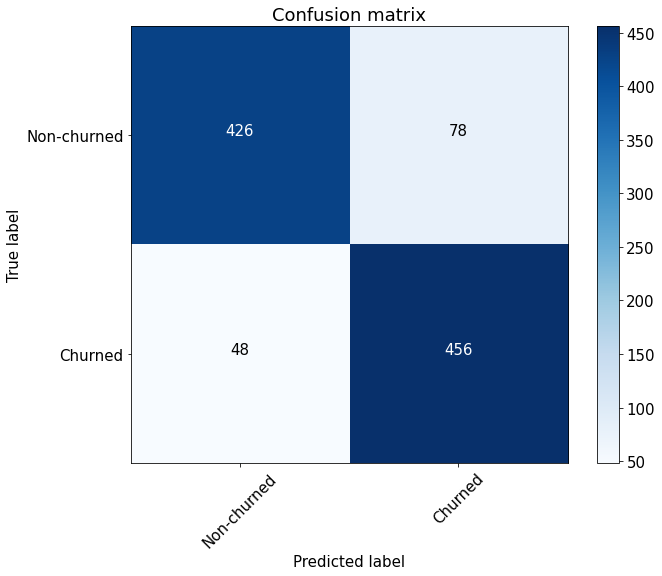

In [200]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_svm1 = confusion_matrix(y_test, loaded_model_svm.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_svm1, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [201]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test,y1_pred_svm))

ROC_AUC score: 0.8749999999999999


### Logistic regression

In [202]:
y1_pred_lr = loaded_model_lr.predict(X_test)

score = metrics.precision_score(y_test,y1_pred_lr, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test,y1_pred_lr, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test,y1_pred_lr, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.862074682245204
Recall score: 0.8611111111111112
F1 score: 0.861018645089365


Confusion matrix, without normalization
[[421  83]
 [ 57 447]]


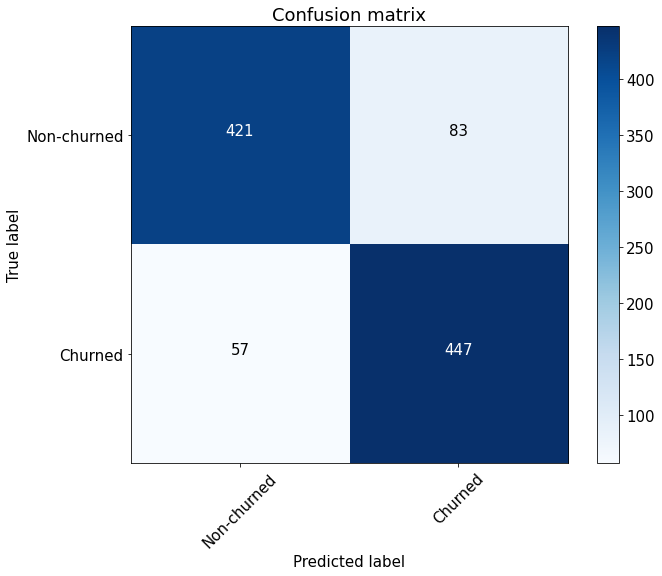

In [203]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_lr1 = confusion_matrix(y_test, loaded_model_lr.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_lr1, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [204]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test,y1_pred_lr))

ROC_AUC score: 0.8611111111111112


### K Neighbours

In [205]:
y1_pred_kn = loaded_model_kn.predict(X_test)

score = metrics.precision_score(y_test,y1_pred_kn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test,y1_pred_kn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test,y1_pred_kn, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.8745021499197495
Recall score: 0.8720238095238095
F1 score: 0.8718117318606482


Confusion matrix, without normalization
[[419  85]
 [ 44 460]]


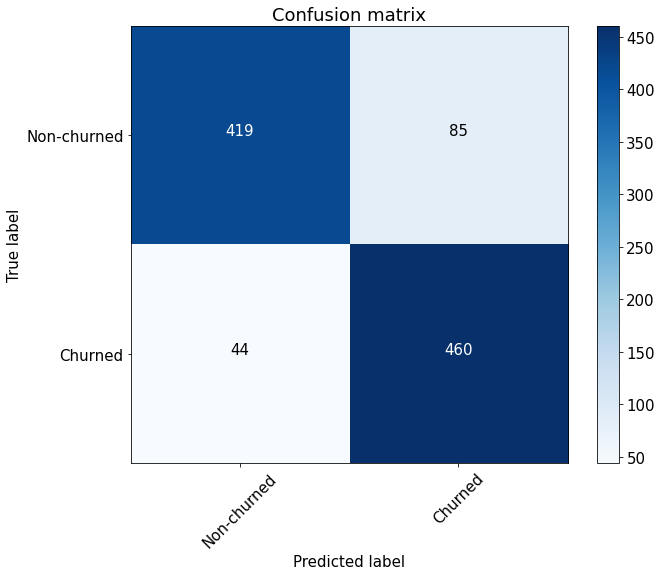

In [206]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_kn1 = confusion_matrix(y_test, loaded_model_kn.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_kn1, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [207]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test,y1_pred_kn))

ROC_AUC score: 0.8720238095238094


# Проверяем на другом тестовом наборе

In [12]:
import cv2
import numpy as np
import os
import radialProfile
import glob
from matplotlib import pyplot as plt
import pickle
from tqdm import tqdm

In [13]:
loaded_model_svm = pickle.load(open('model_svm_BST.sav', 'rb'))
loaded_model_lr = pickle.load(open('model_lr_BST.sav', 'rb'))
loaded_model_kn = pickle.load(open('model_knc_BST.sav', 'rb'))

In [14]:
pkl_file_test1 = open('dataset_test_povetry.pkl', 'rb')
data_test1 = pickle.load(pkl_file_test1)
pkl_file_test1.close()
X_test1 = data_test1["data"]
y_test1 = data_test1["label"]

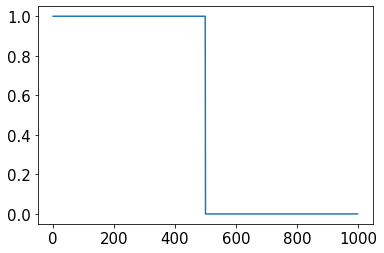

In [15]:
plt.plot(y_test1)

3024 3024


Text(0, 0.5, 'Power Spectrum')

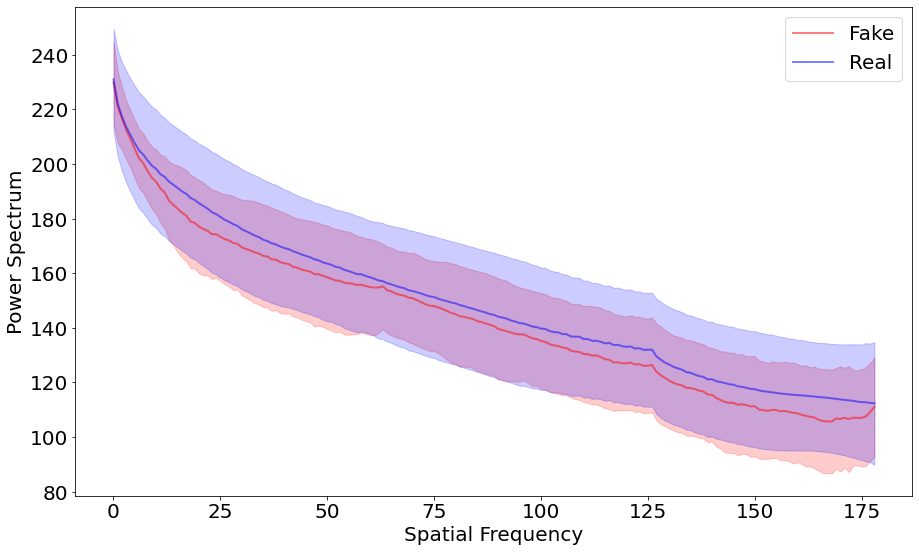

In [14]:
num = int(X_train.shape[0]/2)
num_feat = X_train.shape[1]

psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X_train.shape[0]):   
    if y_train[x]==0:
        psd1D_org_0[cont_0,:] = X_train[x,:]
        cont_0+=1
    elif y_train[x]==1:
        psd1D_org_1[cont_1,:] = X_train[x,:]
        cont_1+=1

print (cont_0, cont_1)        

# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)
ax.legend()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

500 500


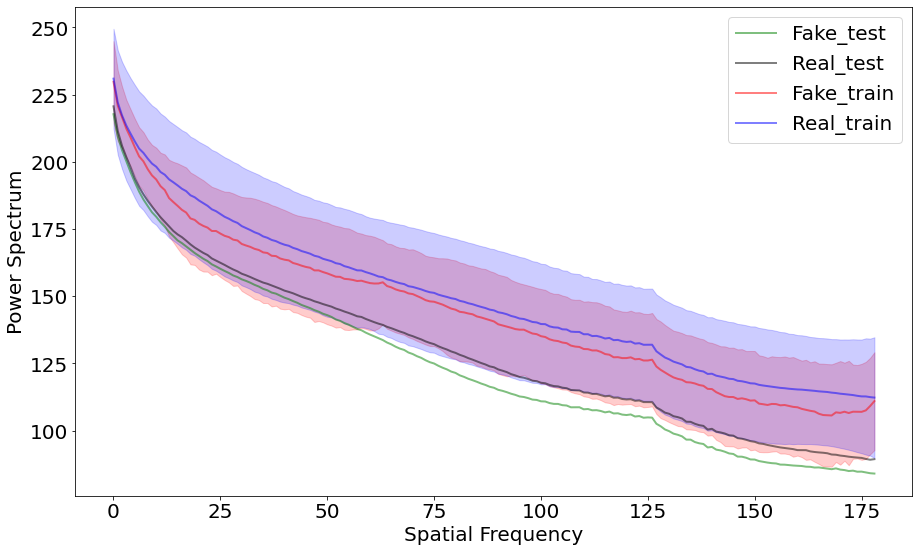

In [39]:
num1 = int(X_test1.shape[0]/2)
num_feat1 = X_test1.shape[1]

psd1D_org1_0 = np.zeros((num1,num_feat1))
psd1D_org1_1 = np.zeros((num1,num_feat1))
psd1D_org1_0_mean = np.zeros(num_feat1)
psd1D_org1_0_std = np.zeros(num_feat1)
psd1D_org1_1_mean = np.zeros(num_feat1)
psd1D_org1_1_std = np.zeros(num_feat1)

cont1_0=0
cont1_1=0

# We separate real and fake using the label
for x in range(X_test1.shape[0]):   
    if y_test1[x]==0:
        psd1D_org1_0[cont1_0,:] = X_test1[x,:]
        cont1_0+=1
    elif y_test1[x]==1:
        psd1D_org1_1[cont1_1,:] = X_test1[x,:]
        cont1_1+=1

print (cont1_0, cont1_1)        

# We compute statistcis
for x in range(num_feat1):
    psd1D_org1_0_mean[x] = np.mean(psd1D_org1_0[:,x])
    psd1D_org1_0_std[x]= np.std(psd1D_org1_0[:,x])
    psd1D_org1_1_mean[x] = np.mean(psd1D_org1_1[:,x])
    psd1D_org1_1_std[x]= np.std(psd1D_org1_1[:,x])
    
# Plot
x1 = np.arange(0, num_feat1, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x1, psd1D_org1_0_mean, alpha=0.5, color='green', label='Fake_test', linewidth =2.0)
#ax.fill_between(x1, psd1D_org1_0_mean - psd1D_org1_0_std, psd1D_org1_0_mean + psd1D_org1_0_std, color='red', alpha=0.2)
ax.plot(x1, psd1D_org1_1_mean, alpha=0.5, color='black', label='Real_test', linewidth =2.0)
#ax.fill_between(x1, psd1D_org1_1_mean - psd1D_org1_1_std, psd1D_org1_1_mean + psd1D_org1_1_std, color='blue', alpha=0.2)

x = np.arange(0, num_feat, 1)
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Fake_train', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Real_train', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)

ax.legend()

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)
plt.savefig("gist.png")

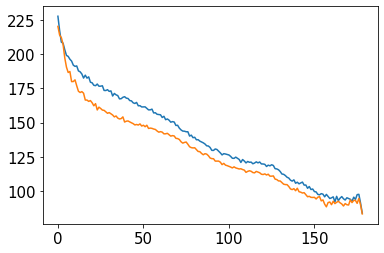

In [38]:
x = np.arange(0, num_feat, 1)
y0 = psd1D_org1_0[1]
y1 = psd1D_org1_1[0]
plt.plot(x, y0)
plt.plot(x, y1)

In [174]:
result_svm = loaded_model_svm.score(X_test1, y_test1)
result_lr = loaded_model_lr.score(X_test1, y_test1)
result_kn = loaded_model_kn.score(X_test1, y_test1)

print(result_svm)
print(result_lr)
print(result_kn)

0.447
0.421
0.458


In [16]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### SVM

In [18]:
y2_pred_svm = loaded_model_svm.predict(X_test1)

score = metrics.precision_score(y_test1,y2_pred_svm, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test1,y2_pred_svm, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test1,y2_pred_svm, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.43997979697316986
Recall score: 0.447
F1 score: 0.4303426494114399


Confusion matrix, without normalization
[[309 191]
 [362 138]]


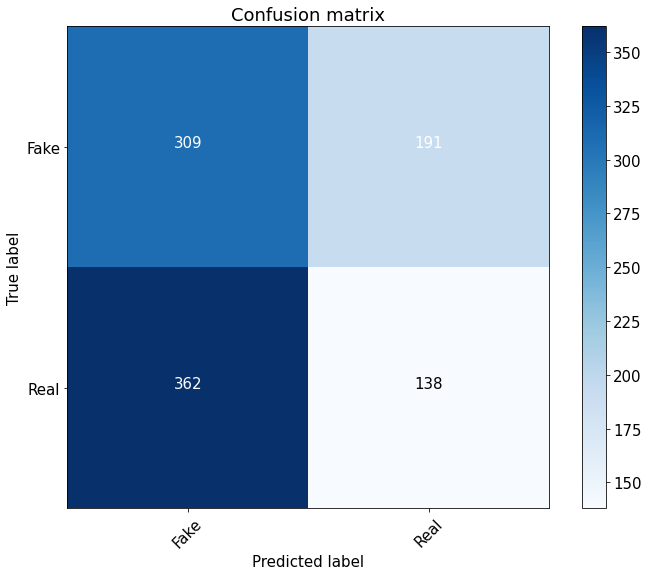

In [30]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_svm2 = confusion_matrix(y_test1, loaded_model_svm.predict(X_test1))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_svm2, classes=['Fake', 'Real'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [177]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test1,y2_pred_svm))

ROC_AUC score: 0.447


### Logistic regression

In [178]:
y2_pred_lr = loaded_model_lr.predict(X_test1)

score = metrics.precision_score(y_test1,y2_pred_lr, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test1,y2_pred_lr, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test1,y2_pred_lr, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.41608563938493953
Recall score: 0.421
F1 score: 0.4123969030576673


Confusion matrix, without normalization
[[271 229]
 [350 150]]


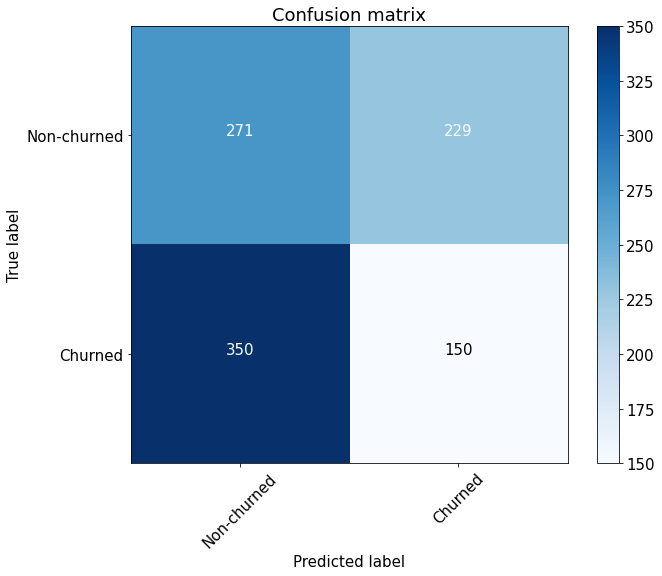

In [179]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_lr2 = confusion_matrix(y_test1, loaded_model_lr.predict(X_test1))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_lr2, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [180]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test1,y2_pred_lr))

ROC_AUC score: 0.42100000000000004


### K Neighbours

In [181]:
y2_pred_kn = loaded_model_kn.predict(X_test1)

score = metrics.precision_score(y_test1,y2_pred_kn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test1,y2_pred_kn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test1,y2_pred_kn, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.45464441219158197
Recall score: 0.458
F1 score: 0.4477862545644235


Confusion matrix, without normalization
[[297 203]
 [339 161]]


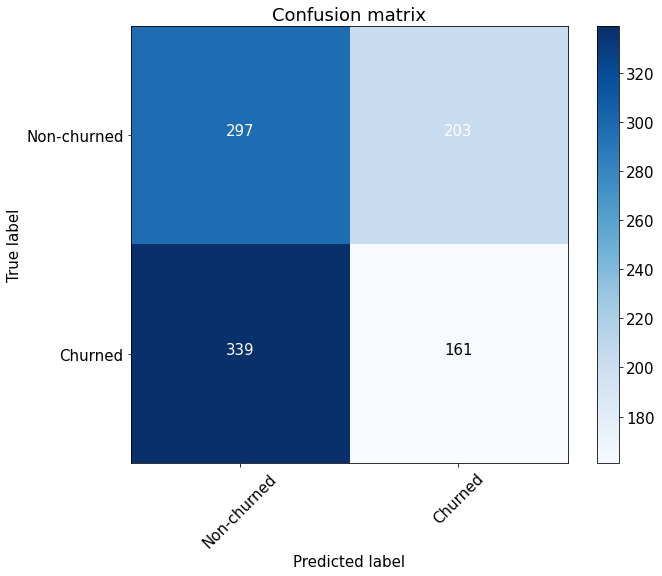

In [182]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_kn2 = confusion_matrix(y_test1, loaded_model_kn.predict(X_test1))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_kn2, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [183]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test1,y2_pred_kn))

ROC_AUC score: 0.45799999999999996


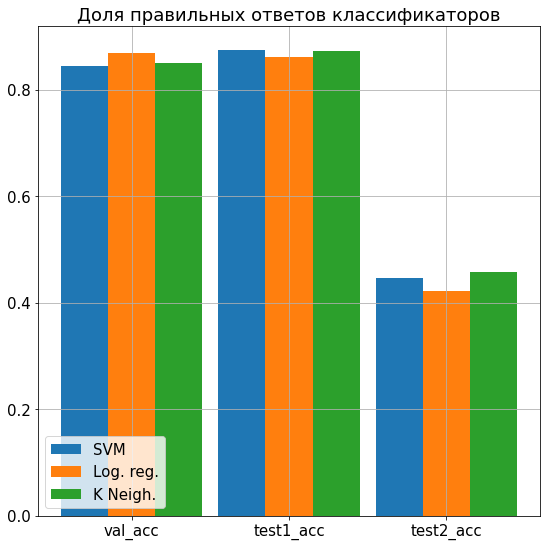

In [235]:
groups = ['val_acc', 'test1_acc', 'test2_acc']
g1 = [svclassifier.score(X_valid, y_valid), svclassifier.score(X_test, y_test), svclassifier.score(X_test1, y_test1)] 
g2 = [logreg.score(X_valid, y_valid), logreg.score(X_test, y_test), logreg.score(X_test1, y_test1)]
g3 = [knc.score(X_valid, y_valid), knc.score(X_test, y_test), knc.score(X_test1, y_test1)]
width = 0.3
x = np.arange(len(groups))
fig, ax = plt.subplots(figsize = (9, 9))
rects1 = ax.bar(x - width, g1, width, label='SVM')
rects2 = ax.bar(x, g2, width, label='Log. reg.')
rects3 = ax.bar(x + width, g3, width, label='K Neigh.')
ax.set_title('Доля правильных ответов классификаторов')
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend(loc = 3)
ax.grid(True)

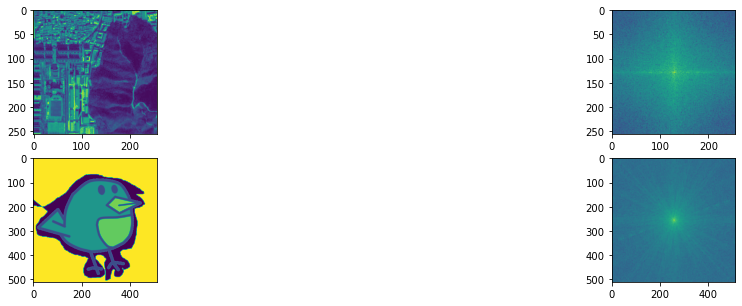

In [11]:
fig = plt.figure(figsize = (19, 5))
p1 = fig.add_subplot(221)
p2 = fig.add_subplot(222)
p3 = fig.add_subplot(223)
p4 = fig.add_subplot(224)

epsilon = 1e-8

img = cv2.imread('C:/Users/lukma/Desktop/DS/BST/train/real/5_12401_A_real_A.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

fshift += epsilon

magnitude_spectrum = 20*np.log(np.abs(fshift))

p1.imshow(img)
p2.imshow(magnitude_spectrum)

img1 = cv2.imread('C:/Users/lukma/Downloads/Icon_Bird_512x512.png', 0)
f1 = np.fft.fft2(img1)
fshift1 = np.fft.fftshift(f1)
fshift1 += epsilon

magnitude_spectrum1 = 20*np.log(np.abs(fshift1))

p3.imshow(img1)
p4.imshow(magnitude_spectrum1)

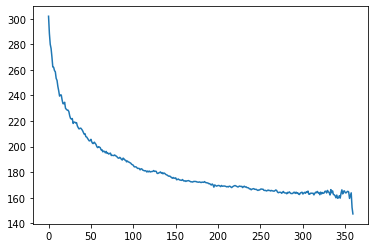

In [29]:
# Calculate the indices from the image
center = None

y, x = np.indices(magnitude_spectrum1.shape)

x
y

if not center:
    center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])

r = np.hypot(x - center[0], y - center[1])

# Get sorted radii
ind = np.argsort(r.flat)
r_sorted = r.flat[ind]
i_sorted = magnitude_spectrum1.flat[ind]

# Get the integer part of the radii (bin size = 1)
r_int = r_sorted.astype(int)

# Find all pixels that fall within each radial bin.
deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
rind = np.where(deltar)[0]       # location of changed radius
nr = rind[1:] - rind[:-1]        # number of radius bin
    
# Cumulative sum to figure out sums for each radius bin
csim = np.cumsum(i_sorted, dtype=float)
tbin = csim[rind[1:]] - csim[rind[:-1]]

radial_prof = tbin / nr

plt.plot(radial_prof)



In [78]:
x

array([[  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       ...,
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255]])

In [77]:
y

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [253, 253, 253, ..., 253, 253, 253],
       [254, 254, 254, ..., 254, 254, 254],
       [255, 255, 255, ..., 255, 255, 255]])

In [81]:
center

array([127.5, 127.5])

In [88]:
len(r.flat)

65536

In [84]:
ind

array([32639, 32640, 32896, ...,   255, 65280, 65535], dtype=int64)

In [91]:
r.flat[ind]

array([  0.70710678,   0.70710678,   0.70710678, ..., 180.3122292 ,
       180.3122292 , 180.3122292 ])

In [92]:
magnitude_spectrum.flat[ind]

array([238.23393786, 262.69693946, 305.64340226, ..., 100.84497254,
       138.57766787, 117.43038026])

In [96]:
len(r_int)

65536

In [97]:
len(deltar)

65535

In [8]:
r.flat[ind]

array([  0.70710678,   0.70710678,   0.70710678, ..., 180.3122292 ,
       180.3122292 , 180.3122292 ])

In [9]:
i_sorted

array([238.23393786, 262.69693946, 305.64340226, ..., 100.84497254,
       138.57766787, 117.43038026])

In [10]:
magnitude_spectrum.flat[ind]

array([238.23393786, 262.69693946, 305.64340226, ..., 100.84497254,
       138.57766787, 117.43038026])

In [11]:
r_int

array([  0,   0,   0, ..., 180, 180, 180])

In [23]:
deltar[31]

1

In [18]:
np.where(deltar)

(array([    3,    11,    31,    51,    79,   111,   155,   207,   255,
          315,   383,   447,   539,   615,   715,   811,   911,  1019,
         1123,  1263,  1395,  1527,  1663,  1803,  1975,  2127,  2291,
         2471,  2643,  2827,  3023,  3227,  3435,  3639,  3851,  4059,
         4303,  4547,  4791,  5023,  5283,  5543,  5807,  6091,  6375,
         6667,  6947,  7231,  7555,  7859,  8183,  8491,  8819,  9175,
         9499,  9855, 10215, 10579, 10959, 11303, 11683, 12095, 12491,
        12891, 13263, 13691, 14107, 14535, 14963, 15379, 15855, 16291,
        16751, 17199, 17691, 18167, 18623, 19115, 19615, 20107, 20635,
        21127, 21651, 22171, 22703, 23235, 23783, 24343, 24883, 25447,
        26007, 26611, 27191, 27767, 28371, 28967, 29579, 30171, 30791,
        31427, 32051, 32687, 33331, 33991, 34663, 35315, 35975, 36623,
        37339, 38023, 38703, 39427, 40127, 40859, 41563, 42271, 43019,
        43747, 44511, 45243, 46007, 46791, 47515, 48319, 49079, 49883,
      